### Exercise 28

#### Import

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import quad
from scipy.stats import norm

#### Functions

In [12]:
def sigma(x):
    return 1/(1 + np.exp(-x))


def f(x):
    return -np.log(1 + x**4) + np.log(sigma(2*x))


def f1(x):
    return -(4*x**3)/(1+x**4) + 2 - 2*sigma(2*x)


def f2(x):
    return (4*x**6 - 12*x**2)/(1 + x**4)**2 - 4*sigma(2*x)*(1 - sigma(2*x))


def f22(x):
    return (4*x**6 - 12*x**2)/(1 + x**4)**2 - 4*np.exp(2*x) / (np.exp(2*x) + 1)**2

#### Find Z

In [13]:
Z, error = quad(lambda x: sigma(2*x)/(1 + x**4), -np.inf, np.inf)

C:\Users\denni\AppData\Local\Temp\ipykernel_12700\2578787126.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [14]:
print(f'Z={np.round(Z, 4)} with error={np.round(error, 13)}')

Z=1.1107 with error=2.2388e-09


In [15]:
def p(x):
    return sigma(2*x)/(1 + x**4) / Z

### Maximise density

In [18]:
res = minimize(lambda x: -f(x), x0=0)
print(f'Successful optimisation: {res.success}')
xhat = res.x

Successful optimisation: True


In [20]:
A = -f2(xhat)

####  Plot

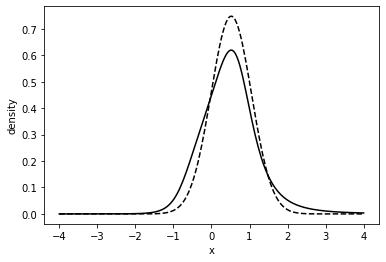

In [21]:
mplot = 200
space = np.linspace(-4, 4, mplot)

plt.plot(space, p(space), color='black', label='p')
plt.plot(space, norm(loc=xhat, scale=A**(-1/2)).pdf(space), color='black', linestyle='dashed', label='Laplace approximation')
#plt.plot(space, norm(loc=xhat, scale=1/2.0).pdf(space), color='black', linestyle='dashed', label='Laplace approximation')
plt.xlabel('x')
plt.ylabel('density')
plt.show()